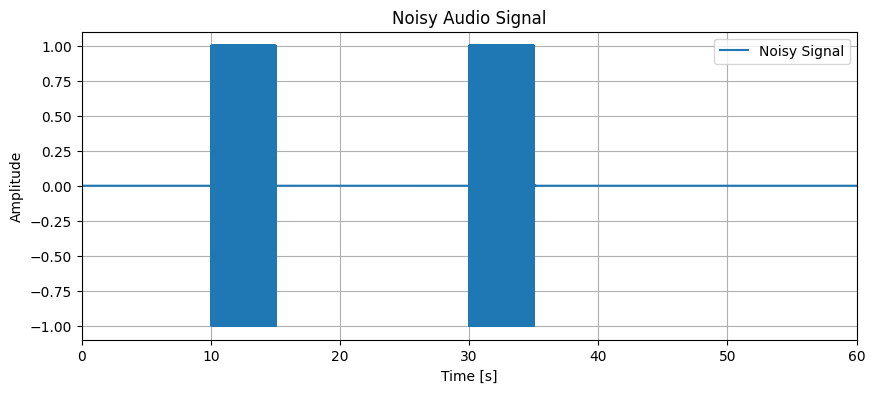

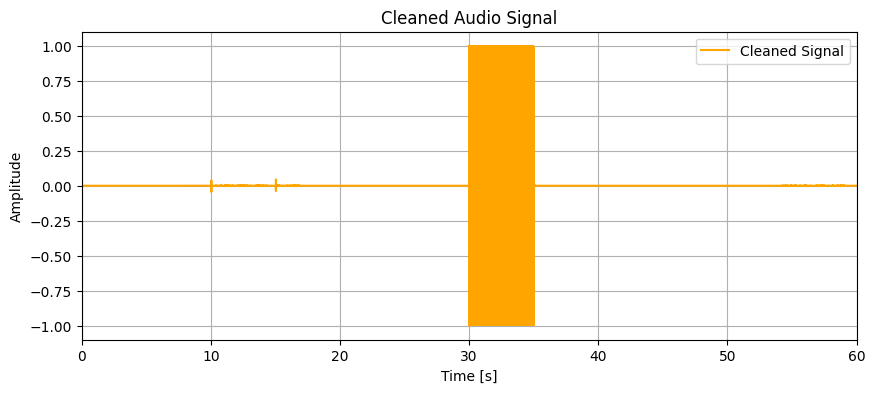

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import butter, lfilter

# Helper function to apply a band-pass filter
def bandpass_filter(data, lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return lfilter(b, a, data)

# Load a noisy audio signal
fs, noisy_signal = wavfile.read('Data/1min_silence_with_5sec_440tone_5sec_60tone.wav')  
noisy_signal = noisy_signal / np.max(np.abs(noisy_signal))  # Normalize

# Visualize the noisy signal with time in seconds on the x-axis
plt.figure(figsize=(10, 4)) 
plt.plot(np.arange(len(noisy_signal)) / fs, noisy_signal, label='Noisy Signal')
plt.title('Noisy Audio Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, len(noisy_signal) / fs)
plt.grid()
plt.show()

# Apply a band-pass filter to remove unwanted frequencies
filtered_signal = bandpass_filter(noisy_signal, lowcut=300, highcut=8000, fs=fs)

# Estimate noise spectrum (e.g., from silent parts of the signal)
noise_estimation = np.mean(filtered_signal[fs*9:fs*15]) 

# Perform spectral subtraction
cleaned_signal = filtered_signal - noise_estimation
cleaned_signal = np.clip(cleaned_signal, -1.0, 1.0)  # Ensure signal stays in range

# Visualize the cleaned signal with time in seconds on the x-axis
plt.figure(figsize=(10, 4))
plt.plot(np.arange(len(cleaned_signal)) / fs, cleaned_signal, label='Cleaned Signal', color='orange')
plt.title('Cleaned Audio Signal')
plt.xlabel('Time [s]')
plt.ylabel('Amplitude')
plt.legend()
plt.xlim(0, len(cleaned_signal) / fs)
plt.grid()
plt.show()


# Save the cleaned signal to a new file
wavfile.write('Output/noise_reduced_audio.wav', fs, (cleaned_signal * 32767).astype(np.int16))